# HGCAL FE studies

Let's take a look at some hgcal data.  First some simple visualizations...

In [4]:
#imports and setup
%matplotlib inline
%cd /home/naodell/work/CMS/hgcal/analysis''

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py

from descartes import PolygonPatch
import ROOT as r
from tqdm import tqdm_notebook

import scripts.helpers as hlp

/home/naodell/work/CMS/hgcal/analysis


In [5]:
rfile = r.TFile('data/single_gamma.root')
tree = rfile.Get('hgcalTriggerNtuplizer/HGCalTriggerNtuple')

n_entries = tree.GetEntriesFast()
df = dict(ievt = [], 
          x = [], y = [],
          zside = [], layer = [], panel = [], sector = [],
          sim_e = [], reco_e = []
         )
df = pd.DataFrame(df)
for i in tqdm_notebook(range(n_entries)):
    tree.GetEntry(i)
    tc_x = np.array(tree.tc_x)
    tc_y = np.array(tree.tc_y)
    tc_zside = np.array(tree.tc_zside)
    tc_layer = np.array(tree.tc_layer, dtype=int)
    tc_panel_n = np.array(tree.tc_panel_number, dtype=int)
    tc_panel_s = np.array(tree.tc_panel_sector, dtype=int)
    tc_energy = np.array(tree.tc_energy)
    tc_simenergy = np.array(tree.tc_simenergy)
    ediff = tc_energy - tc_simenergy

    df_temp = pd.DataFrame(dict(ievt = np.array(tree.tc_n*[int(i),], dtype=int), 
                                x = tc_x, y = tc_y, 
                                zside = tc_zside, layer = tc_layer, panel = tc_panel_n, sector = tc_panel_s,
                                sim_e = tc_simenergy, reco_e = tc_energy, delta_e = ediff))
    df = pd.concat([df, df_temp])

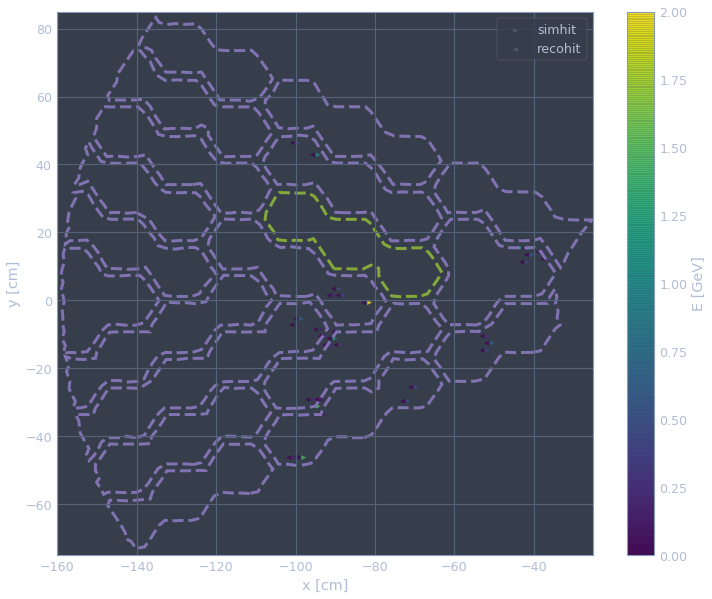

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
patch_file = open('data/panel_patches.pkl', 'rb')
patches = pickle.load(patch_file)
for p, ashape in patches.items():
    if p == 7:
        col = 'C1'
    else:
        col = 'C3'
    patch = PolygonPatch(ashape, fill=False, ec=col, linestyle='--', linewidth=3, label='_nolegend_')
    ax.add_patch(patch)
    
df_skim = df.query('layer == 17 and zside == 1 and sector == 1')[:32]
reco_scat = ax.scatter(df_skim.x+0.75, df_skim.y, c=df_skim.reco_e, 
                       cmap='viridis', 
                       marker='>', 
                       vmin=0.,
                       vmax=2.,
                       s=20, 
                       alpha=0.75
                      )
sim_scat  = ax.scatter(df_skim.x-0.75, df_skim.y, c=df_skim.sim_e, 
                       cmap='viridis', 
                       marker='<', 
                       vmin=0.,
                       vmax=2.,
                       s=20, 
                       alpha=0.75
                      )

ax.set_ylim(-75, 85)
ax.set_xlim(-160, -25)
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
#ax.set_facecolor('white')

cbar_reco = plt.colorbar(reco_scat, ax=ax, label='E [GeV]')
#cbar_sim = plt.colorbar(sim_scat, ax=ax, label=r'$E_{sim}$')
plt.legend(['simhit', 'recohit'])

plt.show()